In [2]:
import numpy as np
import pandas as pd

In [3]:
match = pd.read_csv(r"C:\Users\91965\Downloads\iplDatasets\matches.csv")
delivery = pd.read_csv(r"C:\Users\91965\Downloads\iplDatasets\deliveries.csv")

In [4]:
match.head()

id    Season       city        date                        team1  \
0   1  IPL-2017  Hyderabad  05-04-2017          Sunrisers Hyderabad   
1   2  IPL-2017       Pune  06-04-2017               Mumbai Indians   
2   3  IPL-2017     Rajkot  07-04-2017                Gujarat Lions   
3   4  IPL-2017     Indore  08-04-2017       Rising Pune Supergiant   
4   5  IPL-2017  Bangalore  08-04-2017  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [5]:
match.shape

(756, 18)

In [6]:
delivery.head()


match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [7]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

C:\Users\91965\AppData\Local\Temp\ipykernel_3244\2553512226.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()


In [8]:
total_score_df

match_id  inning  total_runs
0            1       1         207
1            1       2         172
2            2       1         184
3            2       2         187
4            3       1         183
...        ...     ...         ...
1523     11413       2         170
1524     11414       1         155
1525     11414       2         162
1526     11415       1         152
1527     11415       2         157

[1528 rows x 3 columns]

In [9]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [10]:
match_df

id    Season           city        date                team1  \
0         1  IPL-2017      Hyderabad  05-04-2017  Sunrisers Hyderabad   
1         1  IPL-2017      Hyderabad  05-04-2017  Sunrisers Hyderabad   
2         2  IPL-2017           Pune  06-04-2017       Mumbai Indians   
3         2  IPL-2017           Pune  06-04-2017       Mumbai Indians   
4         3  IPL-2017         Rajkot  07-04-2017        Gujarat Lions   
...     ...       ...            ...         ...                  ...   
1523  11413  IPL-2019  Visakhapatnam  08-05-2019  Sunrisers Hyderabad   
1524  11414  IPL-2019  Visakhapatnam  10-05-2019       Delhi Capitals   
1525  11414  IPL-2019  Visakhapatnam  10-05-2019       Delhi Capitals   
1526  11415  IPL-2019      Hyderabad  12-05-2019       Mumbai Indians   
1527  11415  IPL-2019      Hyderabad  12-05-2019       Mumbai Indians   

                            team2                  toss_winner toss_decision  \
0     Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1     Royal Challengers Bangalore  Royal Challengers Bangalore         field   
2          Rising Pune Supergiant       Rising Pune Supergiant         field   
3          Rising Pune Supergiant       Rising Pune Supergiant         field   
4           Kolkata Knight Riders        Kolkata Knight Riders         field   
...                           ...                          ...           ...   
1523               Delhi Capitals               Delhi Capitals         field   
1524          Chennai Super Kings          Chennai Super Kings         field   
1525          Chennai Super Kings          Chennai Super Kings         field   
1526          Chennai Super Kings               Mumbai Indians           bat   
1527          Chennai Super Kings               Mumbai Indians           bat   

      result  dl_applied                  winner  win_by_runs  win_by_wickets  \
0     normal           0     Sunrisers Hyderabad           35               0   
1     normal           0     Sunrisers Hyderabad           35               0   
2     normal           0  Rising Pune Supergiant            0               7   
3     normal           0  Rising Pune Supergiant            0               7   
4     normal           0   Kolkata Knight Riders            0              10   
...      ...         ...                     ...          ...             ...   
1523  normal           0          Delhi Capitals            0               2   
1524  normal           0     Chennai Super Kings            0               6   
1525  normal           0     Chennai Super Kings            0               6   
1526  normal           0          Mumbai Indians            1               0   
1527  normal           0          Mumbai Indians            1               0   

     player_of_match                                      venue  \
0       Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1       Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
2          SPD Smith    Maharashtra Cricket Association Stadium   
3          SPD Smith    Maharashtra Cricket Association Stadium   
4            CA Lynn     Saurashtra Cricket Association Stadium   
...              ...                                        ...   
1523         RR Pant                           ACA-VDCA Stadium   
1524    F du Plessis                           ACA-VDCA Stadium   
1525    F du Plessis                           ACA-VDCA Stadium   
1526       JJ Bumrah         Rajiv Gandhi Intl. Cricket Stadium   
1527       JJ Bumrah         Rajiv Gandhi Intl. Cricket Stadium   

             umpire1         umpire2                  umpire3  match_id  \
0        AY Dandekar        NJ Llong                      NaN         1   
1        AY Dandekar        NJ Llong                      NaN         1   
2     A Nand Kishore          S Ravi                      NaN         2   
3     A Nand Kishore          S Ravi                      NaN         2   
4        Nitin Men

In [11]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [12]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [13]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [14]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [15]:
match_df.shape

(1297, 20)

In [16]:
match_df = match_df[match_df['dl_applied'] == 0]

In [17]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [18]:
delivery_df = match_df.merge(delivery,on='match_id')

In [19]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [20]:
delivery_df

match_id       city               winner  total_runs_x  inning  \
125            1  Hyderabad  Sunrisers Hyderabad           207       2   
126            1  Hyderabad  Sunrisers Hyderabad           207       2   
127            1  Hyderabad  Sunrisers Hyderabad           207       2   
128            1  Hyderabad  Sunrisers Hyderabad           207       2   
129            1  Hyderabad  Sunrisers Hyderabad           207       2   
...          ...        ...                  ...           ...     ...   
303165     11415  Hyderabad       Mumbai Indians           157       2   
303166     11415  Hyderabad       Mumbai Indians           157       2   
303167     11415  Hyderabad       Mumbai Indians           157       2   
303168     11415  Hyderabad       Mumbai Indians           157       2   
303169     11415  Hyderabad       Mumbai Indians           157       2   

                       batting_team         bowling_team  over  ball  \
125     Royal Challengers Bangalore  Sunrisers Hyderabad     1     1   
126     Royal Challengers Bangalore  Sunrisers Hyderabad     1     2   
127     Royal Challengers Bangalore  Sunrisers Hyderabad     1     3   
128     Royal Challengers Bangalore  Sunrisers Hyderabad     1     4   
129     Royal Challengers Bangalore  Sunrisers Hyderabad     1     5   
...                             ...                  ...   ...   ...   
303165          Chennai Super Kings       Mumbai Indians    20     2   
303166          Chennai Super Kings       Mumbai Indians    20     3   
303167          Chennai Super Kings       Mumbai Indians    20     4   
303168          Chennai Super Kings       Mumbai Indians    20     5   
303169          Chennai Super Kings       Mumbai Indians    20     6   

              batsman  ... bye_runs legbye_runs  noball_runs  penalty_runs  \
125          CH Gayle  ...        0           0            0             0   
126     Mandeep Singh  ...        0           0            0             0   
127     Mandeep Singh  ...        0           0            0             0   
128     Mandeep Singh  ...        0           0            0             0   
129     Mandeep Singh  ...        0           0            0             0   
...               ...  ...      ...         ...          ...           ...   
303165      RA Jadeja  ...        0           0            0             0   
303166      SR Watson  ...        0           0            0             0   
303167      SR Watson  ...        0           0            0             0   
303168      SN Thakur  ...        0           0            0             0   
303169      SN Thakur  ...        0           0            0             0   

        batsman_runs  extra_runs  total_runs_y  player_dismissed  \
125                1           0             1               NaN   
126                0           0             0               NaN   
127                0           0             0               NaN   
128                2           0             2               NaN   
129                4           0             4               NaN   
...              ...         ...           ...               ...   
303165             1           0             1               NaN   
303166             2           0             2               NaN   
303167             1           0             1         SR Watson   
303168             2           0             2               NaN   
303169             0           0             0         SN Thakur   

        dismissal_kind    fielder  
125                NaN        NaN  
126                NaN        NaN  
127                NaN        NaN  
128                NaN        NaN  
129                NaN        NaN  
...                ...        ...  
303165             NaN        NaN  
303166             NaN        NaN  
303167         run out  KH Pandya  
303168             NaN        NaN  
303169             lbw        NaN  

[146822 rows x 24 columns]

In [21]:
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

C:\Users\91965\AppData\Local\Temp\ipykernel_3244\3025607697.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']


In [22]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [23]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [24]:
delivery_df

match_id       city               winner  total_runs_x  inning  \
125            1  Hyderabad  Sunrisers Hyderabad           207       2   
126            1  Hyderabad  Sunrisers Hyderabad           207       2   
127            1  Hyderabad  Sunrisers Hyderabad           207       2   
128            1  Hyderabad  Sunrisers Hyderabad           207       2   
129            1  Hyderabad  Sunrisers Hyderabad           207       2   
...          ...        ...                  ...           ...     ...   
303165     11415  Hyderabad       Mumbai Indians           157       2   
303166     11415  Hyderabad       Mumbai Indians           157       2   
303167     11415  Hyderabad       Mumbai Indians           157       2   
303168     11415  Hyderabad       Mumbai Indians           157       2   
303169     11415  Hyderabad       Mumbai Indians           157       2   

                       batting_team         bowling_team  over  ball  \
125     Royal Challengers Bangalore  Sunrisers Hyderabad     1     1   
126     Royal Challengers Bangalore  Sunrisers Hyderabad     1     2   
127     Royal Challengers Bangalore  Sunrisers Hyderabad     1     3   
128     Royal Challengers Bangalore  Sunrisers Hyderabad     1     4   
129     Royal Challengers Bangalore  Sunrisers Hyderabad     1     5   
...                             ...                  ...   ...   ...   
303165          Chennai Super Kings       Mumbai Indians    20     2   
303166          Chennai Super Kings       Mumbai Indians    20     3   
303167          Chennai Super Kings       Mumbai Indians    20     4   
303168          Chennai Super Kings       Mumbai Indians    20     5   
303169          Chennai Super Kings       Mumbai Indians    20     6   

              batsman  ... penalty_runs batsman_runs  extra_runs  \
125          CH Gayle  ...            0            1           0   
126     Mandeep Singh  ...            0            0           0   
127     Mandeep Singh  ...            0            0           0   
128     Mandeep Singh  ...            0            2           0   
129     Mandeep Singh  ...            0            4           0   
...               ...  ...          ...          ...         ...   
303165      RA Jadeja  ...            0            1           0   
303166      SR Watson  ...            0            2           0   
303167      SR Watson  ...            0            1           0   
303168      SN Thakur  ...            0            2           0   
303169      SN Thakur  ...            0            0           0   

        total_runs_y  player_dismissed  dismissal_kind    fielder  \
125                1               NaN             NaN        NaN   
126                0               NaN             NaN        NaN   
127                0               NaN             NaN        NaN   
128                2               NaN             NaN        NaN   
129                4               NaN             NaN        NaN   
...              ...               ...             ...        ...   
303165             1               NaN             NaN        NaN   
303166             2               NaN             NaN        NaN   
303167             1         SR Watson         run out  KH Pandya   
303168             2               NaN             NaN        NaN   
303169             0         SN Thakur             lbw        NaN   

        current_score  runs_left  balls_left  
125                 1        206         119  
126                 1        206         118  
127                 1        206         117  
128                 3        204         116  
129                 7        200         115  
...               ...        ...         ...  
303165            309       -152           4  
303166            311       -154           3  
303167            312       -155           2  
303168            314       -157           1  
303169            314       -157           0  

[146822 rows x 27 columns]

In [25]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10 - wickets


C:\Users\91965\AppData\Local\Temp\ipykernel_3244\1434828071.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values


In [26]:
delivery_df.head()

match_id       city               winner  total_runs_x  inning  \
125         1  Hyderabad  Sunrisers Hyderabad           207       2   
126         1  Hyderabad  Sunrisers Hyderabad           207       2   
127         1  Hyderabad  Sunrisers Hyderabad           207       2   
128         1  Hyderabad  Sunrisers Hyderabad           207       2   
129         1  Hyderabad  Sunrisers Hyderabad           207       2   

                    batting_team         bowling_team  over  ball  \
125  Royal Challengers Bangalore  Sunrisers Hyderabad     1     1   
126  Royal Challengers Bangalore  Sunrisers Hyderabad     1     2   
127  Royal Challengers Bangalore  Sunrisers Hyderabad     1     3   
128  Royal Challengers Bangalore  Sunrisers Hyderabad     1     4   
129  Royal Challengers Bangalore  Sunrisers Hyderabad     1     5   

           batsman  ... batsman_runs extra_runs  total_runs_y  \
125       CH Gayle  ...            1          0             1   
126  Mandeep Singh  ...            0          0             0   
127  Mandeep Singh  ...            0          0             0   
128  Mandeep Singh  ...            2          0             2   
129  Mandeep Singh  ...            4          0             4   

     player_dismissed  dismissal_kind  fielder  current_score  runs_left  \
125                 0             NaN      NaN              1        206   
126                 0             NaN      NaN              1        206   
127                 0             NaN      NaN              1        206   
128                 0             NaN      NaN              3        204   
129                 0             NaN      NaN              7        200   

     balls_left  wickets  
125         119       10  
126         118       10  
127         117       10  
128         116       10  
129         115       10  

[5 rows x 28 columns]

In [27]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [28]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [29]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [30]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [31]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [32]:
final_df = final_df.sample(final_df.shape[0])
final_df.sample()

batting_team                 bowling_team  city  runs_left  \
261200  Chennai Super Kings  Royal Challengers Bangalore  Pune         73   

        balls_left  wickets  total_runs_x       crr       rrr  result  
261200          74        9           131  7.565217  5.918919       1

In [33]:
final_df.dropna(inplace=True)

In [34]:
final_df = final_df[final_df['balls_left'] != 0]

In [35]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [36]:
X_train

batting_team                 bowling_team       city  \
288821               Mumbai Indians  Royal Challengers Bangalore     Mumbai   
300486              Kings XI Punjab          Chennai Super Kings     Mohali   
164174              Kings XI Punjab  Royal Challengers Bangalore  Bangalore   
119284             Delhi Daredevils  Royal Challengers Bangalore  Bangalore   
204991             Delhi Daredevils          Chennai Super Kings    Chennai   
...                             ...                          ...        ...   
169369              Kings XI Punjab             Delhi Daredevils      Delhi   
14457   Royal Challengers Bangalore        Kolkata Knight Riders  Bangalore   
208688        Kolkata Knight Riders          Chennai Super Kings    Kolkata   
257784               Mumbai Indians          Chennai Super Kings       Pune   
188060          Chennai Super Kings             Delhi Daredevils      Delhi   

        runs_left  balls_left  wickets  total_runs_x        crr        rrr  
288821         40          21        6           179   8.424242  11.428571  
300486         48          50        8           172  10.628571   5.760000  
164174        122          76        9           174   7.090909   9.631579  
119284         52          24        5           157   6.562500  13.000000  
204991        -81          50       -2           149  19.714286  -9.720000  
...           ...         ...      ...           ...        ...        ...  
169369        109         113        9           120   9.428571   5.787611  
14457         -16          97       -2            82  25.565217  -0.989691  
208688         79          48        7           165   7.166667   9.875000  
257784        117          69       10           176   6.941176  10.173913  
188060        -23         101        8           181  64.421053  -1.366337  

[115731 rows x 9 columns]

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [39]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [40]:
pipe.fit(X_train,y_train)

C:\Users\91965\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [41]:
y_pred = pipe.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.818166107904469

In [43]:
pipe.predict_proba(X_test)[10]

array([0.68619979, 0.31380021])

In [44]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [45]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [46]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178


end_of_over  runs_after_over  wickets_in_over  lose   win
20790            1                4                0  48.0  52.0
20798            2                8                0  42.7  57.3
20804            3                1                0  42.0  58.0
20810            4                7                1  56.9  43.1
20816            5               12                0  49.0  51.0
20822            6               13                0  40.5  59.5
20828            7                9                0  34.9  65.1
20836            8               15                0  26.4  73.6
20842            9                7                0  23.0  77.0
20849           10               17                0  16.0  84.0
20855           11                9                1  24.8  75.2
20861           12                9                0  20.6  79.4
20867           13                8                0  17.3  82.7
20873           14                8                0  14.5  85.5
20879           15                5                1  24.6  75.4
20886           16                8                1  36.7  63.3
20892           17                8                2  69.4  30.6
20898           18                6                1  81.0  19.0
20904           19                8                2  94.4   5.6
21037           20               20                1  95.1   4.9
21045           21                8                0  94.1   5.9
21051           22                1                0  94.0   6.0
21057           23                7                1  96.6   3.4
21063           24               12                0  95.5   4.5
21069           25               13                0  93.7   6.3
21075           26                9                0  92.2   7.8
21083           27               15                0  88.8  11.2
21089           28                7                0  86.8  13.2
21096           29               17                0  80.7  19.3
21102           30                9                1  87.9  12.1
21108           31                9                0  85.1  14.9
21114           32                8                0  82.2  17.8
21120           33                8                0  78.9  21.1
21126           34                5                1  87.8  12.2
21133           35                8                1  92.8   7.2
21139           36                8                2  98.1   1.9
21145           37                6                1  99.0   1.0
21151           38                8                2  99.7   0.3

Text(0.5, 1.0, 'Target-178')

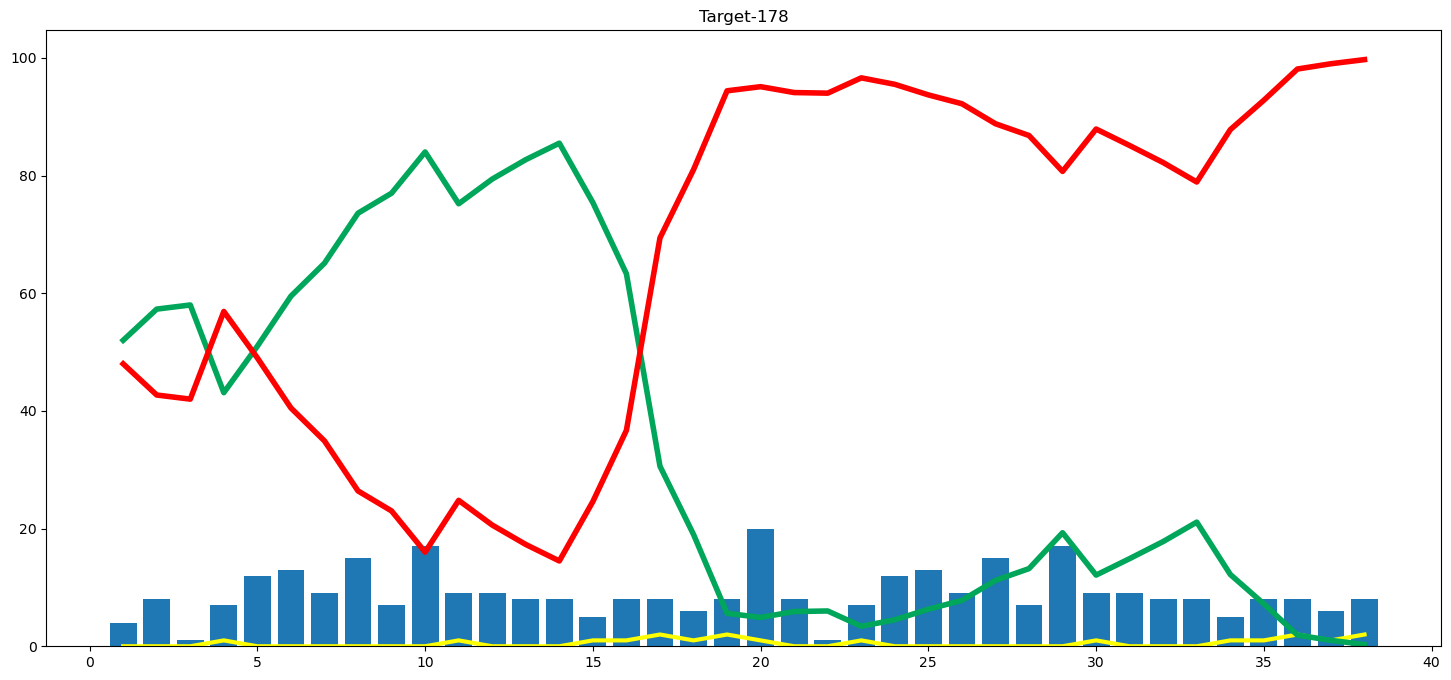

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [48]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [49]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [3]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

NameError: name 'pipe' is not defined

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pickle

# Define your pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Train your pipeline before saving
# Example:
# pipe.fit(X_train, y_train)

# Save the pipeline
with open('pipe.pkl', 'wb') as f:
    pickle.dump(pipe, f)
